In [1]:
import cmdstanpy as csp

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\mirar\anaconda3\envs\stan\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_all = pd.read_csv("data_50000.csv")

In [3]:
N = data_all.shape[0]

# log_minchi2 = np.log(data_all["minchi2"])
z_sigma = data_all["z_sigma"]
median_z = data_all["median_z"]
nu = 3
lambda_var = 1

In [4]:
data = {'N': N, 
        'z_sigma': z_sigma,
        'median_z': median_z,
        'nu': nu,
        'lambda': lambda_var,}

In [6]:
model = csp.CmdStanModel(stan_file = 'hierarchical-regression.stan')
sample = model.sample(data = data, seed = 1, chains = 1,
                      iter_sampling = 1000, iter_warmup = 1000,
                      show_progress = False, show_console = False)

ValueError: Failed to get source info for Stan model 'C:\Users\mirar\Desktop\github-repos\stat-775-final\hierarchical-regression\hierarchical-regression.stan'. Console:
Syntax error in 'C:\Users\mirar\Desktop\github-repos\stat-775-final\hierarchical-regression\hierarchical-regression.stan', line 7, column 34 to column 35, parsing error:
   -------------------------------------------------
     5:      vector[N] z_sigma; // uncertainty in redshift, y
     6:      vector[N] median_z; // measured redshift, x
     7:      int<lower=1, upper=J> group_id[N]; // assign group to an observation
                                           ^
     8:      real<lower=0> a; // pooling parameter for intercept
     9:      real<lower=0> b; // pooling parameter for slope
   -------------------------------------------------

";" expected after variable declaration.


In [41]:
alpha_list = sample.stan_variable("alpha")
beta_list = sample.stan_variable("beta")

In [42]:
print(len(median_z))
print(len(alpha_list))
print(len(beta_list))

50000
1000
1000


In [53]:
zs = np.arange(0, np.max(median_z), np.max(median_z)/1000)
post_sigma_z = alpha_list + beta_list*zs

In [54]:
print(zs.shape)
print(post_sigma_z.shape)

(1000,)
(1000,)


Text(0, 0.5, 'Posterior sigma z')

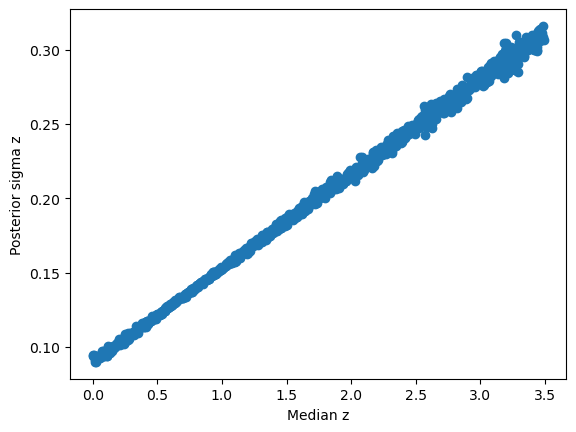

In [55]:
# plt.scatter(median_z, z_sigma)
plt.scatter(zs, post_sigma_z)
plt.xlabel("Median z")
plt.ylabel("Posterior sigma z")

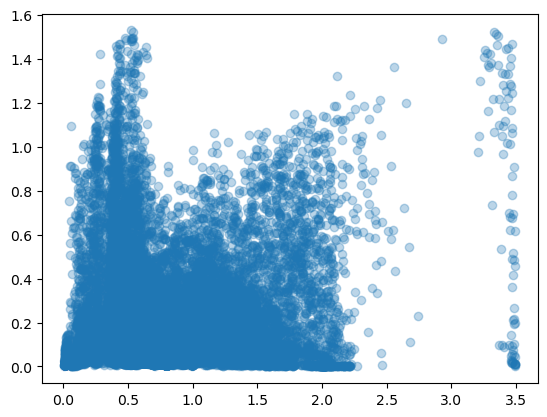

In [62]:
plt.scatter(median_z, z_sigma, alpha=0.3)